In [201]:
%matplotlib inline
from pylab import *

In [214]:
Tice = 271.15            # temperature of ice
H = 1                    # heat capacity of upper ocean layer
F0 = 3.0                 # F_0 value to be used to find value of atmospheric heat transport parameter
A = -49.7                # Budyko-Sellers constant
B = 0.29                 # Budyko-Sellers constant
alpha = 0.29             # effective ice albedo
epsilon = [[1.0,0.0],[0.0,1.0]]            # forcing parameter matrix
length = len(epsilon)
S1 = 40.9                # net incoming solar flux for T_1 box
S2 = 24.1                # net incoming solar flux for T_2 box
gamma1 = 0.035           # constant used to find value of atmospheric heat transport parameter
gamma2 = 0.002852        # constant used to find value of atmospheric heat transport parameter
T10 = 280.0              # initial temperature of T_1 box in kelvin
T20 = 260.0              # initial temperature of T_2 box in kelvin

In [207]:
def HdT1(F,T1,epsilon): # function that gives the value of H*dT_1/dt
    return S1-F-(A+B*T1)+epsilon

def HdT2(a,F,T2,epsilon): # function that gives the value of H*dT_2/dt
    return S2*(1-2*alpha*a)+F-(A+B*T2)+epsilon

def C(T1):               # function that gives value of C(T_1)
    top = T1 - 273.15    # top of fraction in exponential
    bottom = T1 - 35.86  # bottom of fraction in exponential
    fract = top / bottom # fraction in exponential
    return 6.11 * exp(17.23 * fract)

def newF(T1,T2): # function that gives value of atmospheric heat transport parameter
    return F0 + gamma1 * (T1 - T2) + gamma2 * C(T1) * (T1 - T2)

def newa(T1,T2): # function that gives value of fractional area of hemisphere covered in ice
    phiicedeg = 30 + 30 * (T1 - Tice) / (T1 - T2) # phi_ice in degrees
    phiicerad = phiicedeg * pi / 180.0            # phi_ice in radians
    return 1 - sin(phiicerad)

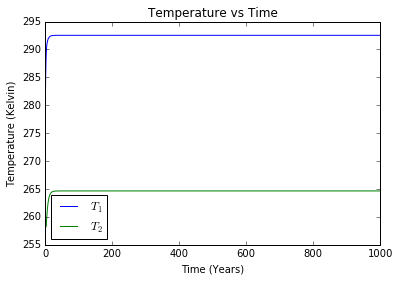

In [248]:
# With all feedbacks on and no forcing
dt = 1.0                 # time step
maxtime = 1000            # length of simulation
t = arange(0,maxtime,dt) # time array
T1 = zeros(maxtime)   # temperature array for T_1 box
T2 = zeros(maxtime)   # temperature array for T_2 box
a = zeros(maxtime)    # fractional area of hemisphere covered in ice array
F = zeros(maxtime)    # atmospheric heat transport array
T1[0] = T10           # sets initial temperature for T_1 box
T2[0] = T20           # sets initial temperature for T_2 box
for i in range(0,len(t)-1):                   # creates loop that cycles through all of the arrays
    F[i] = newF(T1[i],T2[i]) # sets new F value
    a[i] = newa(T1[i],T2[i])             # sets new a value
    T1[i+1] = T1[i] + (HdT1(F[i],T1[i],0.0)) / H * dt             # updates temperature for T_1 box
    T2[i+1] = T2[i] + (HdT2(a[i],F[i],T2[i],0.0)) / H * dt  # updates temperature for T_2 box
plot(t,T1,label="$T_1$")        # plots temperature vs time graph for T_1 box
plot(t,T2,label="$T_2$")        # plots temperature vs time graph for T_2 box
legend(loc="best")
ylabel("Temperature (Kelvin)")
xlabel("Time (Years)")
title("Temperature vs Time")
show()

In [249]:
aeq = a[-2]             # a value at equilibrium
Feq = F[-2]

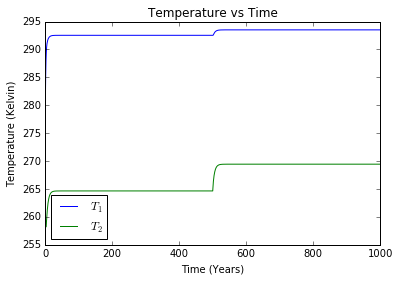

In [247]:
# With all feedbacks on
t = arange(0,maxtime,dt) # time array
Tfon = zeros((2,length,maxtime))
Teqfon = zeros((2,2))
dTfon = zeros((2,2))
a = zeros((length,maxtime))    # fractional area of hemisphere covered in ice array
F = zeros((length,maxtime))    # atmospheric heat transport array
Tfon[0,:,0] = T10           # sets initial temperature for T_1 box
Tfon[1,:,0] = T20           # sets initial temperature for T_2 box
for i in range(0,length):
    for j in range(0,len(t)-1):   # creates loop that cycles through all of the arrays
        F[i][j] = newF(Tfon[0][i][j],Tfon[1][i][j]) # sets new F value
        a[i][j] = newa(Tfon[0][i][j],Tfon[1][i][j])             # sets new a value  
        if j < maxtime / 2.0:
            Teqfon[i][0] = Tfon[0][i][j]
            Teqfon[i][1] = Tfon[1][i][j]
            Tfon[0][i][j+1] = Tfon[0][i][j] + (HdT1(F[i][j],Tfon[0][i][j],0.0)) / H * dt             # updates temperature for T_1 box
            Tfon[1][i][j+1] = Tfon[1][i][j] + (HdT2(a[i][j],F[i][j],Tfon[1][i][j],0.0)) / H * dt  # updates temperature for T_2 box
        else:
            Tfon[0][i][j+1] = Tfon[0][i][j] + (HdT1(F[i][j],Tfon[0][i][j],epsilon[i][0])) / H * dt             # updates temperature for T_1 box
            Tfon[1][i][j+1] = Tfon[1][i][j] + (HdT2(a[i][j],F[i][j],Tfon[1][i][j],epsilon[i][1])) / H * dt  # updates temperature for T_2 box
    dTfon[i][0] = Tfon[0][i][-1] - Teqfon[i][0]
    dTfon[i][1] = Tfon[1][i][-1] - Teqfon[i][1]
plot(t,Tfon[0][1],label="$T_1$")        # plots temperature vs time graph for T_1 box
plot(t,Tfon[1][1],label="$T_2$")        # plots temperature vs time graph for T_2 box
legend(loc="best")
ylabel("Temperature (Kelvin)")
xlabel("Time (Years)")
title("Temperature vs Time")
show()

In [ ]:
lambdafon = zeros((2,2))
for i in range(0,length):
    lambdafon[i]

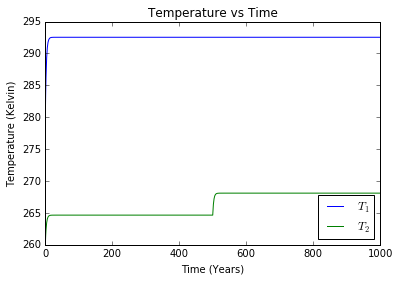

In [250]:
# With all feedbacks off
t = arange(0,maxtime,dt) # time array
Tfoff = zeros((2,length,maxtime))
Teqfoff = zeros((2,2))
dTfoff = zeros((2,2))
Tfoff[0,:,0] = T10           # sets initial temperature for T_1 box
Tfoff[1,:,0] = T20           # sets initial temperature for T_2 box
for i in range(0,length):
    for j in range(0,len(t)-1):   # creates loop that cycles through all of the arrays
        if j < maxtime / 2.0:
            Teqfoff[i][0] = Tfoff[0][i][j]
            Teqfoff[i][1] = Tfoff[1][i][j]
            Tfoff[0][i][j+1] = Tfoff[0][i][j] + (HdT1(Feq,Tfoff[0][i][j],0.0)) / H * dt             # updates temperature for T_1 box
            Tfoff[1][i][j+1] = Tfoff[1][i][j] + (HdT2(aeq,Feq,Tfoff[1][i][j],0.0)) / H * dt  # updates temperature for T_2 box
        else:
            Tfoff[0][i][j+1] = Tfoff[0][i][j] + (HdT1(Feq,Tfoff[0][i][j],epsilon[i][0])) / H * dt             # updates temperature for T_1 box
            Tfoff[1][i][j+1] = Tfoff[1][i][j] + (HdT2(aeq,Feq,Tfoff[1][i][j],epsilon[i][1])) / H * dt  # updates temperature for T_2 box
    dTfoff[i][0] = Tfoff[0][i][-1] - Teqfoff[i][0]
    dTfoff[i][1] = Tfoff[1][i][-1] - Teqfoff[i][1]
plot(t,Tfoff[0][1],label="$T_1$")        # plots temperature vs time graph for T_1 box
plot(t,Tfoff[1][1],label="$T_2$")        # plots temperature vs time graph for T_2 box
legend(loc="best")
ylabel("Temperature (Kelvin)")
xlabel("Time (Years)")
title("Temperature vs Time")
show()

In [277]:
lambdafoff = zeros((2,2))
for i in range(0,length):
    lambdafoff[:,i] = dTfoff[i,:]

In [278]:
#ignore for now
dT1feedoff = -T1eqfeedoff + T1[-1]
dT2feedoff = -T2eqfeedoff + T2[-1]
GT1feedoff = dT1feedon / dT1feedoff
GT2feedoff = dT2feedon / dT2feedoff
lambdaT1 = dT1feedoff / epsilon1
lambdaT2 = dT2feedoff / epsilon2
fT1 = -1.0 / GT1feedoff + 1.0
fT2 = -1.0 / GT2feedoff + 1.0
cT1 = fT1 / lambdaT1
cT2 = fT2 / lambdaT2
print("dT",dT1feedoff,dT2feedoff)
print("Gain",GT1feedoff,GT2feedoff)
print("Sensitivity",lambdaT1,lambdaT2)
print("Feedback term",fT1,fT2)
print("Coefficient",cT1,cT2)

dT 5.68434188608e-14 0.0
Gain 4.23120954943e+13 inf
Sensitivity inf nan
Feedback term 1.0 1.0
Coefficient 0.0 nan


C:\Users\Chace\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Chace\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Chace\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars


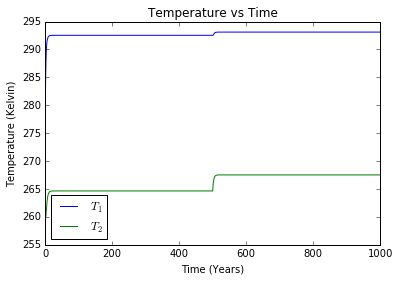

In [251]:
# Top-down
t = arange(0,maxtime,dt) # time array
Ttd = zeros((2,length,maxtime))
Teqtd = zeros((2,2))
dTtd = zeros((2,2))
F = zeros((length,maxtime))    # atmospheric heat transport array
Ttd[0,:,0] = T10           # sets initial temperature for T_1 box
Ttd[1,:,0] = T20           # sets initial temperature for T_2 box
for i in range(0,length):
    for j in range(0,len(t)-1):   # creates loop that cycles through all of the arrays
        F[i][j] = newF(Ttd[0][i][j],Ttd[1][i][j]) # sets new F value
        if j < maxtime / 2.0:
            Teqtd[i][0] = Ttd[0][i][j]
            Teqtd[i][1] = Ttd[1][i][j]
            Ttd[0][i][j+1] = Ttd[0][i][j] + (HdT1(F[i][j],Ttd[0][i][j],0.0)) / H * dt             # updates temperature for T_1 box
            Ttd[1][i][j+1] = Ttd[1][i][j] + (HdT2(aeq,F[i][j],Ttd[1][i][j],0.0)) / H * dt  # updates temperature for T_2 box
        else:
            Ttd[0][i][j+1] = Ttd[0][i][j] + (HdT1(F[i][j],Ttd[0][i][j],epsilon[i][0])) / H * dt             # updates temperature for T_1 box
            Ttd[1][i][j+1] = Ttd[1][i][j] + (HdT2(aeq,F[i][j],Ttd[1][i][j],epsilon[i][1])) / H * dt  # updates temperature for T_2 box
    dTtd[i][0] = Ttd[0][i][-1] - Teqtd[i][0]
    dTtd[i][1] = Ttd[1][i][-1] - Teqtd[i][1]
plot(t,Ttd[0][1],label="$T_1$")        # plots temperature vs time graph for T_1 box
plot(t,Ttd[1][1],label="$T_2$")        # plots temperature vs time graph for T_2 box
legend(loc="best")
ylabel("Temperature (Kelvin)")
xlabel("Time (Years)")
title("Temperature vs Time")
show()

In [274]:
lambdatd = zeros((2,2))
for i in range(0,length):
    lambdatd[:,i] = dTtd[i,:]

In [197]:
dT1topdown = T1[-1] - T1eqtopdown
dT2topdown = T2[-1] - T2eqtopdown
GT1phi = dT1phi / dT10phi
GT2phi = dT2phi / dT20phi
lambdaT1 = dT10phi / epsilon1
lambdaT2 = dT20phi / epsilon2
fT1 = -1.0 / GT1phi + 1.0
fT2 = -1.0 / GT2phi + 1.0
cT1 = fT1 / lambdaT1
cT2 = fT2 / lambdaT2
print("dT_alpha",dT1phi,dT2phi)
print('dT_0',dT10phi,dT20phi)
print('Gain',GT1phi,GT2phi)
print('Sensitivity',lambdaT1,lambdaT2)
print('Feedback',fT1,fT2)
print('Coefficient',cT1,cT2)

dT_alpha 12.5430567519 4.65393034129
dT_0 14.7429920219 5.90227093339
Gain 0.850780949572 0.788498256656
Sensitivity 14.7429920219 inf
Feedback -0.175390681353 -0.268233622026
Coefficient -0.0118965459042 -0.0


C:\Users\Chace\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in double_scalars


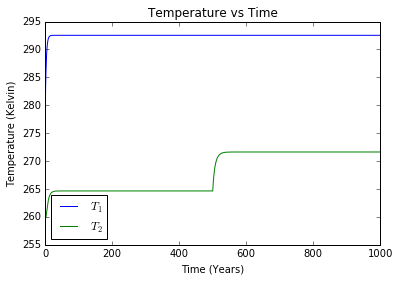

In [254]:
# Bottom-up
t = arange(0,maxtime,dt) # time array
Tbu = zeros((2,length,maxtime))
Teqbu = zeros((2,2))
dTbu = zeros((2,2))
a = zeros((length,maxtime))    # fractional area of hemisphere covered in ice array
F = zeros((length,maxtime))    # atmospheric heat transport array
Tbu[0,:,0] = T10           # sets initial temperature for T_1 box
Tbu[1,:,0] = T20           # sets initial temperature for T_2 box
for i in range(0,length):
    for j in range(0,len(t)-1):   # creates loop that cycles through all of the arrays
        a[i][j] = newa(Tbu[0][i][j],Tbu[1][i][j])             # sets new a value  
        if j < maxtime / 2.0:
            Teqbu[i][0] = Tbu[0][i][j]
            Teqbu[i][1] = Tbu[1][i][j]
            Tbu[0][i][j+1] = Tbu[0][i][j] + (HdT1(Feq,Tbu[0][i][j],0.0)) / H * dt             # updates temperature for T_1 box
            Tbu[1][i][j+1] = Tbu[1][i][j] + (HdT2(a[i][j],Feq,Tbu[1][i][j],0.0)) / H * dt  # updates temperature for T_2 box
        else:
            Tbu[0][i][j+1] = Tbu[0][i][j] + (HdT1(Feq,Tbu[0][i][j],epsilon[i][0])) / H * dt             # updates temperature for T_1 box
            Tbu[1][i][j+1] = Tbu[1][i][j] + (HdT2(a[i][j],Feq,Tbu[1][i][j],epsilon[i][1])) / H * dt  # updates temperature for T_2 box
    dTbu[i][0] = Tbu[0][i][-1] - Teqbu[i][0]
    dTbu[i][1] = Tbu[1][i][-1] - Teqbu[i][1]
plot(t,Tbu[0][1],label="$T_1$")        # plots temperature vs time graph for T_1 box
plot(t,Tbu[1][1],label="$T_2$")        # plots temperature vs time graph for T_2 box
legend(loc="best")
ylabel("Temperature (Kelvin)")
xlabel("Time (Years)")
title("Temperature vs Time")
show()

In [290]:
lambdabu = zeros((2,2))
for i in range(0,length):
    lambdabu[:,i] = dTbu[i,:]
Gbu = zeros((2,2))
invlambdafoff = zeros((2,2))
term = 1.0 / (lambdafoff[0][0] * lambdafoff[1][1] - lambdafoff[0][1] * lambdafoff[1][0])
invlambdafoff[0][0] = lambdafoff[1][1] * term
invlambdafoff[0][1] = -lambdafoff[0][1] * term
invlambdafoff[1][0] = -lambdafoff[1][0] * term
invlambdafoff[1][1] = lambdafoff[0][0] * term
print(term)
for i in range(0,2):
    for j in range(0,2):
        Gbu[i][j] = lambdabu[i][j] * invlambdafoff[i][j] + lambdabu[i][j-1] * invlambdafoff[i-1][j]
print(Gbu,invlambdafoff[0][0] * lambdabu[0][0] + invlambdafoff[1][0] * lambdabu[0][1])

0.0841
[[ 1.          1.        ]
 [ 2.02364753  2.02364753]] 1.0
